In [1]:
# 데이터 준비

import pandas as pd
import seaborn as sns 

#load_dataset 함수 사용 -> DF 변환
df = sns.load_dataset('titanic')

#IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
rdf.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype=object)

In [4]:
rdf

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


In [5]:
# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))
rdf

714


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


In [6]:
# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

C:\Users\CDL\AppData\Local\Temp\ipykernel_7500\3740832083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['embarked'].fillna(most_freq, inplace=True)


In [7]:
rdf.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,714,714,714,714,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,556,355,413,413,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [10]:
# 속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y = ndf['survived']                      #종속 변수 Y

In [11]:
# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [12]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


## KNN

In [13]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print('예측:', y_hat[:30])
print('실제:', y_test.values[:30])

예측: [0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0]
실제: [0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0]


### 훈련된 모델을 이용하여 분류모델 평가지표 확인

In [14]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(len(X_test))
print(knn_matrix)

215
[[109  17]
 [ 27  62]]


In [15]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_hat).ravel()
print(TN, FP, FN, TP)

109 17 27 62


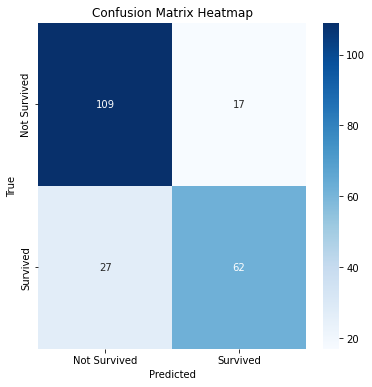

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 테스트 데이터로 모델의 예측값을 얻음
y_pred = knn.predict(X_test)

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 설정 (0: 생존하지 않은 경우, 1: 생존한 경우)
class_labels = ['Not Survived', 'Survived']

# 히트맵 그리기
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [17]:
# 전체 예측(양성, 음성)에서 정답을 잘 맞춘 것
accuracy = (TP+TN) / (TN+FP+FN+TP)
print('정확도(accuracy):', accuracy)

정확도(accuracy): 0.7953488372093023


In [18]:
# "양성으로 예측"한 것 중 "실제 양성"인 것
precision = TP / (TP + FP)
print('정밀도(precision):', precision) 

정밀도(precision): 0.7848101265822784


In [19]:
# "실제 음성"인데 "예측을 음성"이라고 한 것
specificity = TN / (TN+FP)
print('특이도(Specificity):', specificity) 

특이도(Specificity): 0.8650793650793651


In [20]:
# "실제 양성"인데 "예측을 양성"이라고 한 것
sensitivity = TP / (TP+FN)
print('민감도(재현율, Recall, Sensitivity):', sensitivity)

민감도(재현율, Recall, Sensitivity): 0.6966292134831461


In [21]:
# "음성으로 예측"한 것들 중 "실제 음성"인 것
NPV = TN / (TN+FN)
print('음성 예측 가치(NPV):', NPV)

음성 예측 가치(NPV): 0.8014705882352942


In [22]:
# 조화 평균(정밀도와 민감도를 이용한 점수)
f1_score = 2 * ((precision*sensitivity) / (precision+sensitivity))
print('f1-score(조화평균):', f1_score)

f1-score(조화평균): 0.738095238095238


In [23]:
# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       126
           1       0.78      0.70      0.74        89

    accuracy                           0.80       215
   macro avg       0.79      0.78      0.79       215
weighted avg       0.79      0.80      0.79       215



In [24]:
knn.score(X_test, y_test) # 정확도

0.7953488372093023

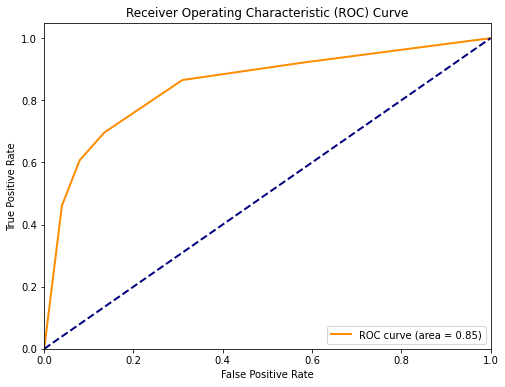

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# test data의 예측 확률을 얻음
y_prob = knn.predict_proba(X_test)[:, 1]  # 클래스 1 (생존)에 대한 예측 확률

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)   

LogisticRegression()

In [27]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = lr.predict(X_test)

print('예측:', y_hat[:30])
print('실제:', y_test.values[:30])

예측: [0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0]
실제: [0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0]


### 훈련된 모델을 이용하여 분류 모델 평가지표 확인

In [28]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
lr_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(len(X_test))
print(lr_matrix)

215
[[106  20]
 [ 30  59]]


In [29]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_hat).ravel()
print(TN, FP, FN, TP)

106 20 30 59


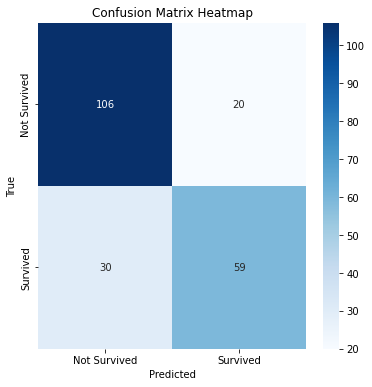

In [30]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 테스트 데이터로 모델의 예측값을 얻음
y_pred = lr.predict(X_test)

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 설정 (0: 생존하지 않은 경우, 1: 생존한 경우)
class_labels = ['Not Survived', 'Survived']

# 히트맵 그리기
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [31]:
# 전체 예측(양성, 음성)에서 정답을 잘 맞춘 것
accuracy = (TP+TN) / (TN+FP+FN+TP)
print('정확도(accuracy):', accuracy)

정확도(accuracy): 0.7674418604651163


In [32]:
# "양성으로 예측"한 것 중 "실제 양성"인 것
precision = TP / (TP + FP)
print('정밀도(precision):', precision) 

정밀도(precision): 0.7468354430379747


In [33]:
# "실제 음성"인데 "예측을 음성"이라고 한 것
specificity = TN / (TN+FP)
print('특이도(Specificity):', specificity) 

특이도(Specificity): 0.8412698412698413


In [34]:
# "실제 양성"인데 "예측을 양성"이라고 한 것
sensitivity = TP / (TP+FN)
print('민감도(재현율, Recall, Sensitivity):', sensitivity)

민감도(재현율, Recall, Sensitivity): 0.6629213483146067


In [35]:
# "음성으로 예측"한 것들 중 "실제 음성"인 것
NPV = TN / (TN+FN)
print('음성 예측 가치(NPV):', NPV)

음성 예측 가치(NPV): 0.7794117647058824


In [36]:
# 조화 평균(정밀도와 민감도를 이용한 점수)
f1_score = 2 * ((precision*sensitivity) / (precision+sensitivity))
print('f1-score(조화평균):', f1_score)

f1-score(조화평균): 0.7023809523809523


In [37]:
# 모형 성능 평가 - 평가지표 계산
lr_report = metrics.classification_report(y_test, y_hat)            
print(lr_report)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       126
           1       0.75      0.66      0.70        89

    accuracy                           0.77       215
   macro avg       0.76      0.75      0.76       215
weighted avg       0.77      0.77      0.76       215



In [38]:
lr.score(X_test, y_test) # 정확도

0.7674418604651163

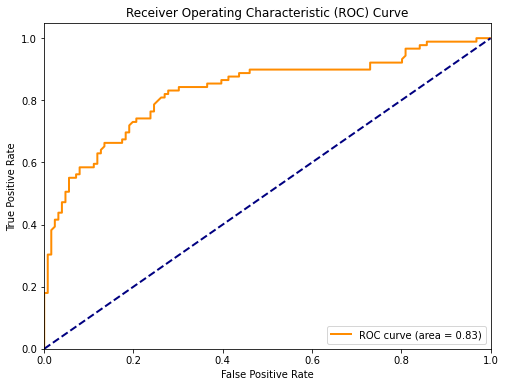

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# test data의 예측 확률을 얻음
y_prob = lr.predict_proba(X_test)[:, 1]  # 클래스 1 (생존)에 대한 예측 확률

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 결정 트리(DT)

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9619238476953907
0.7674418604651163


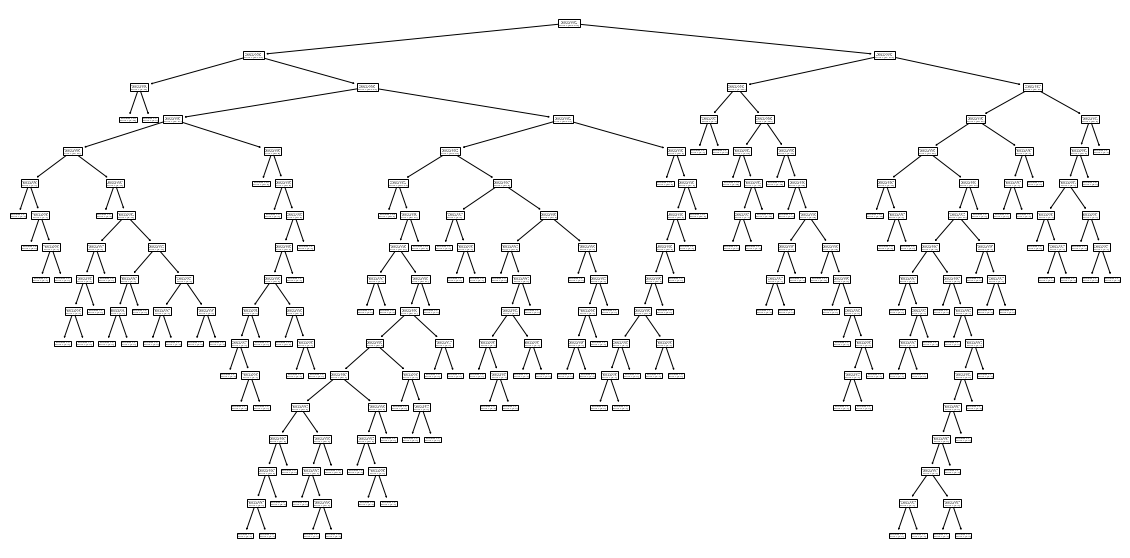

In [42]:
# plot_tree() 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

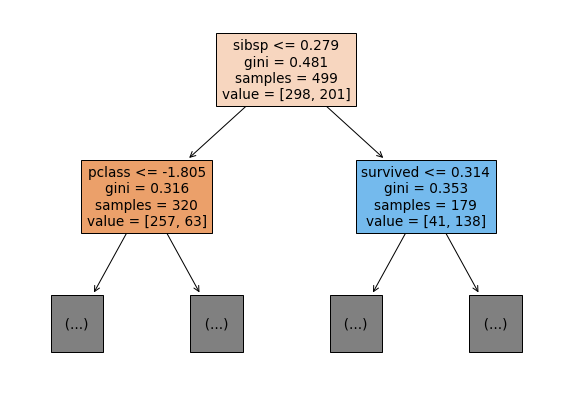

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'])
plt.show()

### 가지치기

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8356713426853707
0.7674418604651163


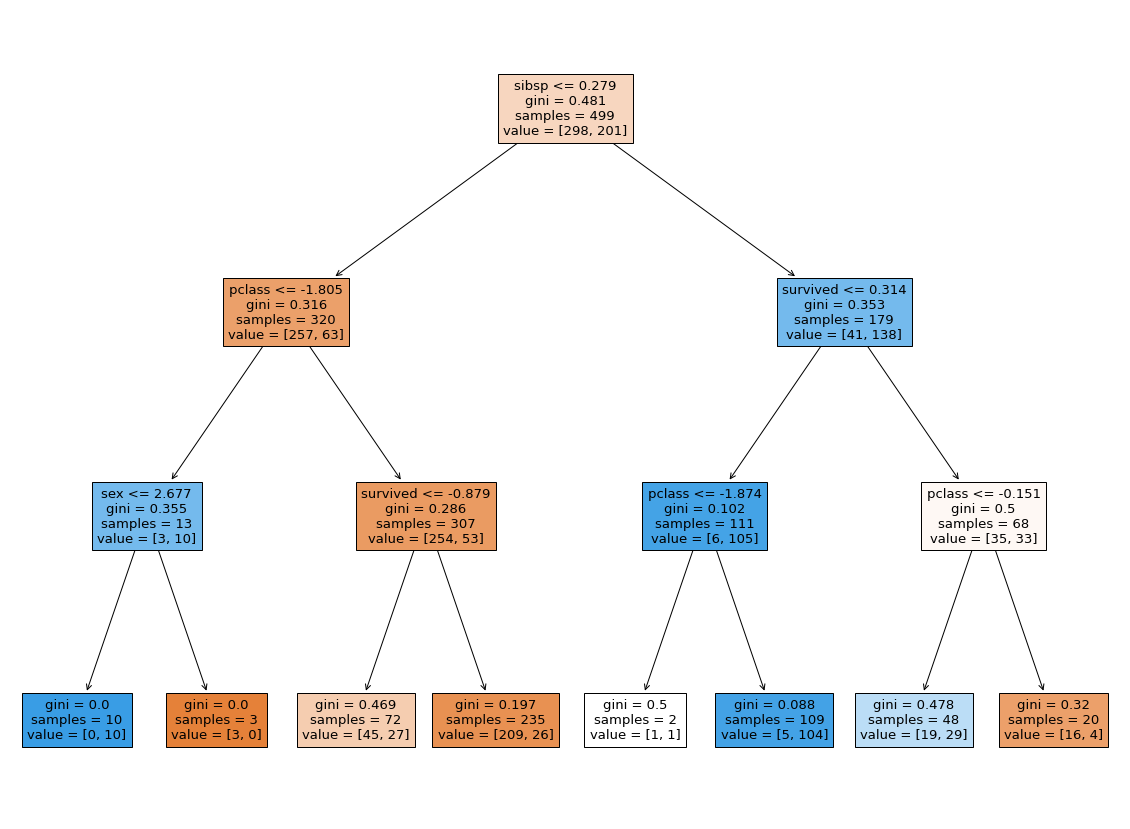

In [45]:
# 그래프로 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked'])
plt.show()

### 훈련된 모델을 이용하여 분류 모델 평가지표 확인

In [46]:
# test data를 가지고 y_hat을 예측 (분류) 
y_hat = dt.predict(X_test)

print('예측:', y_hat[:30])
print('실제:', y_test.values[:30])

예측: [0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0]
실제: [0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0]


In [47]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
dt_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(len(X_test))
print(dt_matrix)

215
[[109  17]
 [ 33  56]]


In [48]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_hat).ravel()
print(TN, FP, FN, TP)

109 17 33 56


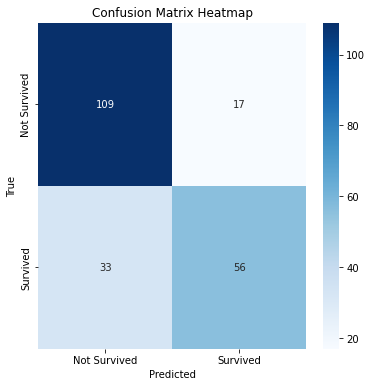

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 테스트 데이터로 모델의 예측값을 얻음
y_pred = dt.predict(X_test)

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 설정 (0: 생존하지 않은 경우, 1: 생존한 경우)
class_labels = ['Not Survived', 'Survived']

# 히트맵 그리기
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [50]:
# 전체 예측(양성, 음성)에서 정답을 잘 맞춘 것
accuracy = (TP+TN) / (TN+FP+FN+TP)
print('정확도(accuracy):', accuracy)

정확도(accuracy): 0.7674418604651163


In [51]:
# "양성으로 예측"한 것 중 "실제 양성"인 것
precision = TP / (TP + FP)
print('정밀도(precision):', precision) 

정밀도(precision): 0.7671232876712328


In [52]:
# "실제 음성"인데 "예측을 음성"이라고 한 것
specificity = TN / (TN+FP)
print('특이도(Specificity):', specificity) 

특이도(Specificity): 0.8650793650793651


In [53]:
# "실제 양성"인데 "예측을 양성"이라고 한 것
sensitivity = TP / (TP+FN)
print('민감도(재현율, Recall, Sensitivity):', sensitivity)

민감도(재현율, Recall, Sensitivity): 0.6292134831460674


In [54]:
# "음성으로 예측"한 것들 중 "실제 음성"인 것
NPV = TN / (TN+FN)
print('음성 예측 가치(NPV):', NPV)

음성 예측 가치(NPV): 0.7676056338028169


In [55]:
# 조화 평균(정밀도와 민감도를 이용한 점수)
f1_score = 2 * ((precision*sensitivity) / (precision+sensitivity))
print('f1-score(조화평균):', f1_score)

f1-score(조화평균): 0.691358024691358


In [56]:
# 모형 성능 평가 - 평가지표 계산
dt_report = metrics.classification_report(y_test, y_hat)            
print(dt_report)

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       126
           1       0.77      0.63      0.69        89

    accuracy                           0.77       215
   macro avg       0.77      0.75      0.75       215
weighted avg       0.77      0.77      0.76       215



In [57]:
dt.score(X_test, y_test)

0.7674418604651163

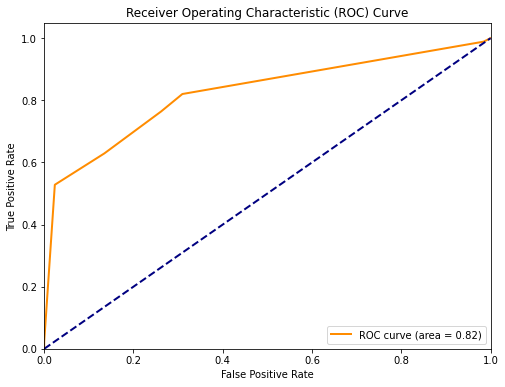

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# test data의 예측 확률을 얻음
y_prob = dt.predict_proba(X_test)[:, 1]  # 클래스 1 (생존)에 대한 예측 확률

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 교차검증

In [59]:
# 데이터 준비

import pandas as pd
import seaborn as sns 

#load_dataset 함수 사용 -> DF 변환
df = sns.load_dataset('titanic')

#IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
data = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]
target = ndf['survived']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size = 0.2, random_state=42)

### 모델 준비_KNN

In [65]:
# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [68]:
### 교차검증

from sklearn.model_selection import cross_validate

scores = cross_validate(knn, X_train, y_train) # 알아서 훈련/검증 데이터로 나눔
scores

{'fit_time': array([0.00299144, 0.00297475, 0.00299215, 0.00197601, 0.00199437]),
 'score_time': array([0.00600123, 0.00498652, 0.0039897 , 0.00598383, 0.00498605]),
 'test_score': array([0.82608696, 0.81578947, 0.79824561, 0.74561404, 0.78070175])}

In [69]:
import numpy as np
np.mean(scores['test_score'])

0.7932875667429442

### 모델준비_로지스틱 회귀

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train) 

LogisticRegression()

In [71]:
### 교차검증

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, X_train, y_train) # 알아서 훈련/검증 데이터로 나눔
scores

C:\Users\CDL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\CDL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

{'fit_time': array([0.01797628, 0.02396178, 0.02096176, 0.01997066, 0.01696253]),
 'score_time': array([0.00197124, 0.00196719, 0.00197744, 0.00198817, 0.00097156]),
 'test_score': array([0.7826087 , 0.78070175, 0.81578947, 0.86842105, 0.83333333])}

In [72]:
import numpy as np
np.mean(scores['test_score'])

0.8161708619374523

### 모델 준비_DT

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
### 교차검증

from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train) # 알아서 훈련/검증 데이터로 나눔
scores

{'fit_time': array([0.00398922, 0.00498509, 0.00299168, 0.00299263, 0.00299191]),
 'score_time': array([0.00199628, 0.00099707, 0.00099707, 0.00099707, 0.00099683]),
 'test_score': array([0.75652174, 0.8245614 , 0.76315789, 0.79824561, 0.80701754])}

In [64]:
import numpy as np
np.mean(scores['test_score'])

0.7899008390541571